<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

# Data Split

In [3]:
X = data_values[:, 0:8]
y = data_values[:,8]

# Holdount

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None, shuffle = True)

[Text(0, 0, 'health \n 0.65'), Text(0, 0, 'sick\n0.35')]

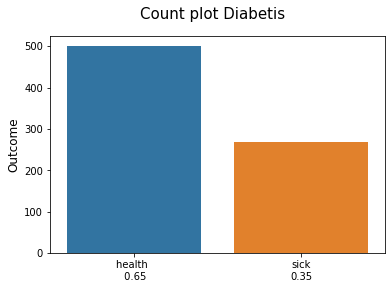

In [5]:
fig, ax = plt.subplots(figsize = (6,4))
fig.suptitle('Count plot Diabetis', fontsize = 15)
sns.countplot(x=data_values[:,8], ax = ax)
ax.set_ylabel('Outcome', size = 12)
_, data_target = np.unique(data_values[:,8], return_counts = True)
len_data = data_values.shape[0]
pe = '{0:.2f}'.format(data_target[1]/len_data)
ps = '{0:.2f}'.format(data_target[0]/len_data)
ax.set_xticklabels([f'health \n {ps}', f'sick\n{pe}'])

- Hay un desbalance

In [6]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

In [8]:
# Problema de optimización
loss, accuracy, recall = model.evaluate(X_train, y_train)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy)
print('Loss: %.3f'% loss)

17/17 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.6909 - recall: 0.1061
Recall: 0.106
Accuracy: 0.691
Loss: 0.566


In [9]:
# Problema de optimización
val_loss, val_accuracy, val_recall = model.evaluate(X_test, y_test)
print('Val Recall: %.3f' % recall)
print('Val Accuracy: %.3f' % accuracy)
print('val Loss: %.3f'% loss)

8/8 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.6061 - recall: 0.0562
Val Recall: 0.106
Val Accuracy: 0.691
val Loss: 0.566


In [10]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


# val loss and Loss

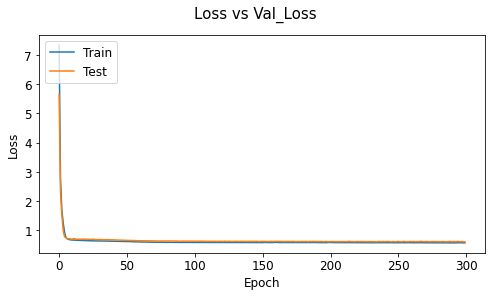

In [11]:
fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle('Loss vs Val_Loss', fontsize = 15)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch', size = 12)
ax.set_ylabel('Loss', size = 12)
ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
ax.tick_params(labelsize = 12)

- La perdida de entrenamiento y validación converge, no se presenta overfitting
- La perdada sigue siendo alta
- Requiero mas datos

# Predictions

In [12]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = np.reshape(y_pred, y_pred.shape[0])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [13]:
for i in range(15):
  print('%s --> %d (real %d)'% (X_test[i].tolist(), y_pred[i], y_test[i]))

[1.0, 88.0, 78.0, 29.0, 76.0, 32.0, 0.365, 29.0] --> 0 (real 0)
[2.0, 112.0, 86.0, 42.0, 160.0, 38.4, 0.24600000000000002, 28.0] --> 0 (real 0)
[5.0, 124.0, 74.0, 0.0, 0.0, 34.0, 0.22, 38.0] --> 0 (real 1)
[2.0, 134.0, 70.0, 0.0, 0.0, 28.9, 0.542, 23.0] --> 0 (real 1)
[2.0, 130.0, 96.0, 0.0, 0.0, 22.6, 0.268, 21.0] --> 0 (real 0)
[5.0, 168.0, 64.0, 0.0, 0.0, 32.9, 0.135, 41.0] --> 0 (real 1)
[1.0, 97.0, 66.0, 15.0, 140.0, 23.2, 0.48700000000000004, 22.0] --> 0 (real 0)
[8.0, 110.0, 76.0, 0.0, 0.0, 27.8, 0.237, 58.0] --> 0 (real 0)
[0.0, 123.0, 88.0, 37.0, 0.0, 35.2, 0.19699999999999998, 29.0] --> 0 (real 0)
[0.0, 128.0, 68.0, 19.0, 180.0, 30.5, 1.391, 25.0] --> 0 (real 1)
[0.0, 180.0, 78.0, 63.0, 14.0, 59.4, 2.42, 25.0] --> 0 (real 1)
[2.0, 92.0, 52.0, 0.0, 0.0, 30.1, 0.141, 22.0] --> 0 (real 0)
[4.0, 90.0, 0.0, 0.0, 0.0, 28.0, 0.61, 31.0] --> 1 (real 0)
[2.0, 99.0, 52.0, 15.0, 94.0, 24.6, 0.637, 21.0] --> 0 (real 0)
[0.0, 162.0, 76.0, 56.0, 100.0, 53.2, 0.759, 25.0] --> 0 (real 1)


# Sesgo predictivo

In [14]:
#sesgo predicción = promedio de predicciones - promedio de etiquetas (observaciones) en el conjunto de datos

# Sick
average_prediction = (len(y_pred[y_pred==1])/len(y_pred))
average_label_target = (len(y_test[y_test==1]) / len(y_test)) 
sesgo_prediction = average_prediction - average_label_target
sesgo_prediction

-0.3333333333333333

# Confusion Matrix

In [15]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[135,   7],
       [ 84,   5]])

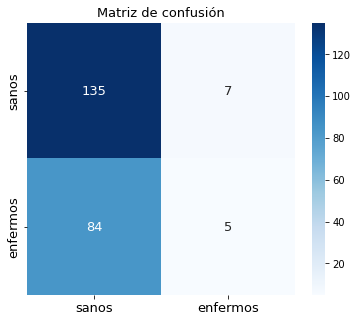

In [16]:
fig, ax = plt.subplots(nrows= 1, ncols=  1, figsize = (6,5))
sns.heatmap(matrix, annot=True, ax = ax, cmap=plt.cm.Blues, fmt = 'g', annot_kws={'size': 13})
ax.set_title('Matriz de confusión', size = 13)
ax.xaxis.set_ticklabels(['sanos', 'enfermos'])
ax.yaxis.set_ticklabels(['sanos', 'enfermos'])
ax.tick_params(labelsize = 13)

# Metrics

In [17]:
print(f'Accuracy  :   {metrics.accuracy_score(y_test, y_pred)}')
print(f'Kappa     :   {metrics.cohen_kappa_score(y_test, y_pred)}')

print(f'predicción enfermos')
print(f'Prediction:   {metrics.precision_score(y_test, y_pred, [1], average="macro")}')
print(f'Recall    :   {metrics.recall_score(y_test, y_pred, [1], average="macro")}')

VN = matrix[0,0]
FP = matrix[0,1]
specificity = VN/(VN+FP)

print(f'Specificity:   {specificity}')
print(f'F1-score   :   {metrics.f1_score(y_test, y_pred, [1], average="macro")}' )

Accuracy  :   0.6060606060606061
Kappa     :   0.008209483368718962
predicción enfermos
Prediction:   0.4166666666666667
Recall    :   0.056179775280898875
Specificity:   0.9507042253521126
F1-score   :   0.09900990099009901


- El modelo es deficiente al momento de predecir los enfermos

# Cross Validation

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cvscores_loss_train = []
cvscores_loss_test = []
cvscores_recall_train = []
cvscores_recall_test = []

for train, test in kfold.split(X,y):
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)
  loss_train, _,recall_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_recall_train.append(recall_train)
  loss_test, _, recall_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_recall_test.append(recall_test)
  print('======================================================================')
  print('loss: %.3f recall: %.3f%% val_loss: %.3f val_recall: %.3f%%' % (loss_train, recall_train*100, loss_test, loss_test*100))

loss: 0.521 recall: 41.079% val_loss: 0.446 val_recall: 44.649%
loss: 0.617 recall: 20.332% val_loss: 0.550 val_recall: 54.993%
loss: 0.504 recall: 46.888% val_loss: 0.554 val_recall: 55.382%
loss: 0.494 recall: 60.166% val_loss: 0.469 val_recall: 46.893%


In [ ]:
print('==============================Train Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_train), np.std(cvscores_recall_train)))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_test), np.std(cvscores_recall_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Recall k{len(cvscores_recall_train)} vs Val_Recaal k{len(cvscores_recall_test)}', fontsize = 10)
ax.plot(cvscores_recall_train)
ax.plot(cvscores_recall_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Recall', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)